# Exploring US Births

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Summary

In [2]:
import pandas as pnd

file_ssa = "./data/US_births_2000-2014_SSA.csv"
file_cdc = "./data/US_births_1994-2003_CDC_NCHS.csv"
births2000_2014 = pnd.read_csv(file_ssa)
births1994_2003 = pnd.read_csv(file_cdc)

In [3]:
births1994_2003.info()
births1994_2003.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 5 columns):
year             3652 non-null int64
month            3652 non-null int64
date_of_month    3652 non-null int64
day_of_week      3652 non-null int64
births           3652 non-null int64
dtypes: int64(5)
memory usage: 142.7 KB


year        month  date_of_month  day_of_week        births
count  3652.000000  3652.000000    3652.000000  3652.000000   3652.000000
mean   1998.499726     6.523549      15.727820     3.999726  10876.817360
std       2.872293     3.449005       8.800529     2.000753   1858.566631
min    1994.000000     1.000000       1.000000     1.000000   6443.000000
25%    1996.000000     4.000000       8.000000     2.000000   8844.500000
50%    1998.500000     7.000000      16.000000     4.000000  11615.000000
75%    2001.000000    10.000000      23.000000     6.000000  12274.250000
max    2003.000000    12.000000      31.000000     7.000000  14540.000000

In [4]:
births2000_2014.info()
births2000_2014.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 5 columns):
year             5479 non-null int64
month            5479 non-null int64
date_of_month    5479 non-null int64
day_of_week      5479 non-null int64
births           5479 non-null int64
dtypes: int64(5)
memory usage: 214.1 KB


year        month  date_of_month  day_of_week        births
count  5479.000000  5479.000000    5479.000000  5479.000000   5479.000000
mean   2006.999270     6.522723      15.730243     3.999817  11350.068261
std       4.321085     3.449075       8.801151     2.000502   2325.821049
min    2000.000000     1.000000       1.000000     1.000000   5728.000000
25%    2003.000000     4.000000       8.000000     2.000000   8740.000000
50%    2007.000000     7.000000      16.000000     4.000000  12343.000000
75%    2011.000000    10.000000      23.000000     6.000000  13082.000000
max    2014.000000    12.000000      31.000000     7.000000  16081.000000

## Prepare the data

First of all, we should visually check to see if the number of babies born match for dates between 2000 and 2003.

In [5]:
births1994_2003[births1994_2003["year"] == 2003].head(3)
births2000_2014[births2000_2014["year"] == 2003].head(3)

births1994_2003[births1994_2003["year"] == 2002].head(3)
births2000_2014[births2000_2014["year"] == 2002].head(3)

births1994_2003[births1994_2003["year"] == 2000].head(3)
births2000_2014[births2000_2014["year"] == 2000].head(3)

year  month  date_of_month  day_of_week  births
3287  2003      1              1            3    7783
3288  2003      1              2            4   10863
3289  2003      1              3            5   11965

year  month  date_of_month  day_of_week  births
1096  2003      1              1            3    7908
1097  2003      1              2            4   11124
1098  2003      1              3            5   12252

year  month  date_of_month  day_of_week  births
2922  2002      1              1            2    7790
2923  2002      1              2            3   10420
2924  2002      1              3            4   12134

year  month  date_of_month  day_of_week  births
731  2002      1              1            2    7927
732  2002      1              2            3   10723
733  2002      1              3            4   12465

year  month  date_of_month  day_of_week  births
2191  2000      1              1            6    8843
2192  2000      1              2            7    7816
2193  2000      1              3            1   11123

year  month  date_of_month  day_of_week  births
0  2000      1              1            6    9083
1  2000      1              2            7    8006
2  2000      1              3            1   11363

Clearly the birth numbers vary. We'll merge the dataframes using only the SSA data where the dates intersect (2000 to 2003).

In [6]:
births_all = births1994_2003[births1994_2003["year"] < 2000].append(births2000_2014)
births_all.head()
births_all.tail()

year  month  date_of_month  day_of_week  births
0  1994      1              1            6    8096
1  1994      1              2            7    7772
2  1994      1              3            1   10142
3  1994      1              4            2   11248
4  1994      1              5            3   11053

year  month  date_of_month  day_of_week  births
5474  2014     12             27            6    8656
5475  2014     12             28            7    7724
5476  2014     12             29            1   12811
5477  2014     12             30            2   13634
5478  2014     12             31            3   11990

In [7]:
cols_minus_births = ["year", "month", "date_of_month", "day_of_week"]
for col in cols_minus_births:
    births_all[col].value_counts().sort_index()

1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
Name: year, dtype: int64

1     651
2     593
3     651
4     630
5     651
6     630
7     651
8     651
9     630
10    651
11    630
12    651
Name: month, dtype: int64

1     252
2     252
3     252
4     252
5     252
6     252
7     252
8     252
9     252
10    252
11    252
12    252
13    252
14    252
15    252
16    252
17    252
18    252
19    252
20    252
21    252
22    252
23    252
24    252
25    252
26    252
27    252
28    252
29    236
30    231
31    147
Name: date_of_month, dtype: int64

1    1096
2    1096
3    1096
4    1095
5    1095
6    1096
7    1096
Name: day_of_week, dtype: int64

## In general, what month(s) encourage more pregnancies? 

Investigate patterns related to when (months, seasons) people decide to get pregnant.

It would be nice to find out if most people generally get pregnant in the late fall early winter months as that is the general belief. To keep things simple, we'll assume that all pregnancies last exactly 40 weeks.

In [8]:
def dateStr(obj_series):
    date = [str(dt) for dt in list(obj_series)]
    return '/'.join(date)

date_cols = ["year","month","date_of_month"]
full_date_str = births_all[date_cols].apply(dateStr, axis=1)
births_all["pregnancy_start"] = pnd.to_datetime(full_date_str, format="%Y/%m/%d") - pnd.Timedelta(40*7, unit='d')
births_all["pregnancy_start"].head()

0   1993-03-27
1   1993-03-28
2   1993-03-29
3   1993-03-30
4   1993-03-31
Name: pregnancy_start, dtype: datetime64[ns]

In [9]:
plot_colours = ["#66C2A5", "#FC8D62", "#8DA0CB", "#E78AC3", 
                "#A6D854", "#FFD92F", "#E5C494", "#B3B3B3"]   # for bar plots
boxplot_colours = ["#FFFFE5", "#F7FCB9", "#D9F0A3", "#ADDD8E", "#78C679",
                   "#41AB5D", "#238443", "#006837", "#004529"]   # for monthly boxplots
other_colours = ["#1B9E77", "#D95F02", "#7570B3", "#E7298A"]

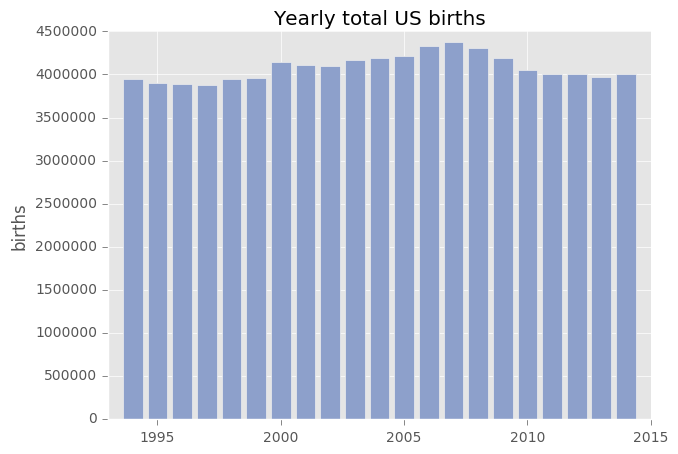

In [10]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#plt.style.use("default")
plt.style.use("ggplot")

### yearly total births
yearly_births = births_all.groupby("year")["births"].agg({"total_births": np.sum})

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1)
ax.bar(yearly_births.index, yearly_births["total_births"], 0.8,
        align="center", color=plot_colours[2])
ax.set_xlim(1993, 2015)
ax.set_ylabel("births")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(right="off", top="off")
plt.title("Yearly total US births")
plt.show();

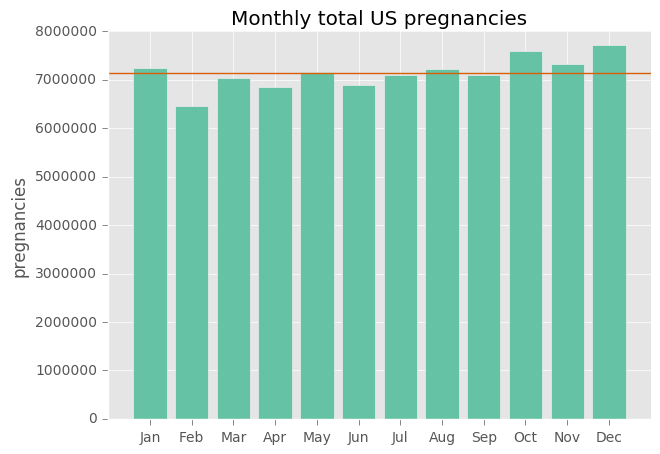

In [11]:
births_all["month_lab"] = births_all["pregnancy_start"].dt.month
month_arr = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
             "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

### Total pregnancies - by month, from 1994 to 2014.
monthly_births = births_all.groupby("month_lab")["births"].agg({"total_births": np.sum})
median_births = np.median(monthly_births["total_births"])

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1)
ax.bar(monthly_births.index, monthly_births["total_births"], 0.8,
        align="center", color=plot_colours[0])
ax.set_xlim(0,13)
ax.set_xticks(monthly_births.index)
ax.set_xticklabels(month_arr)
ax.set_ylabel("pregnancies")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(right="off", top="off")
plt.axhline(median_births, color=other_colours[1])
plt.title("Monthly total US pregnancies")
plt.show();

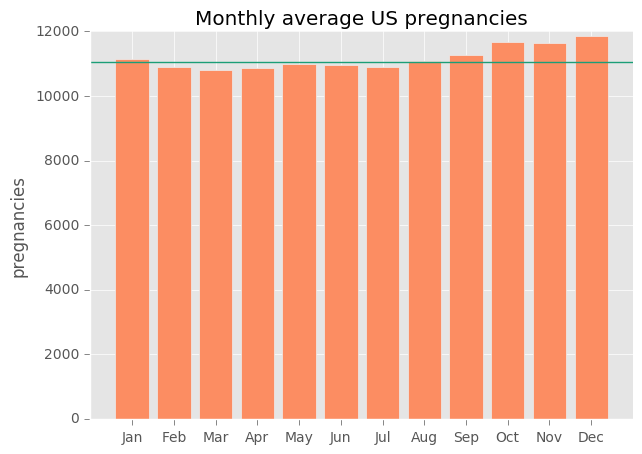

In [12]:
### Average number of monthly pregnancies
avg_monthly_births = births_all.groupby("month_lab")["births"].agg({"avg_births": np.mean})
avg_monthly_median = np.median(avg_monthly_births["avg_births"])

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1)
ax.bar(avg_monthly_births.index, avg_monthly_births["avg_births"], 0.8,
        align="center", color=plot_colours[1])
ax.set_xlim(0,13)
ax.set_xticks(avg_monthly_births.index)
ax.set_xticklabels(month_arr)
ax.set_ylabel("pregnancies")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(right="off", top="off")
plt.axhline(avg_monthly_median, color=other_colours[0])
plt.title("Monthly average US pregnancies")
plt.show();

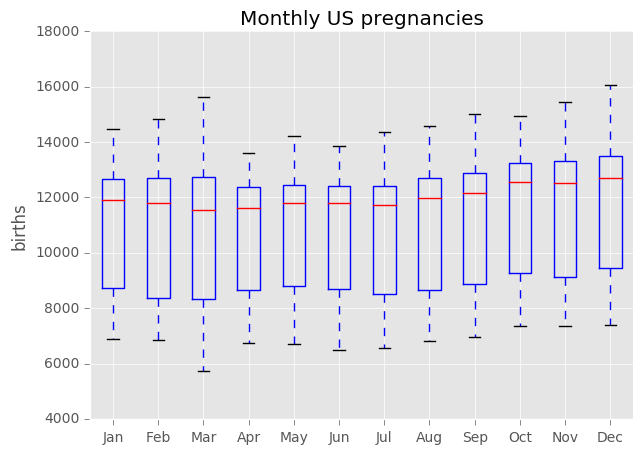

In [13]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1)

arr_of_cols = []
for index, mon in enumerate(month_arr):
    tmp_df = (births_all[births_all["month_lab"] == index+1])
    arr_of_cols.append(tmp_df["births"])

ax.boxplot(arr_of_cols)
ax.set_xticklabels(month_arr)
ax.set_ylabel("births")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(right="off", top="off")
plt.title("Monthly US pregnancies")
plt.show();

There is a gradual increase in the number of pregnanices as we go from summer to autumn/fall. Looking at the average monthly plot, the fall and winter months (September to January) are the highest above the median line. The average for May is higher than the expected trend, relative to April and June. This could be explained by the fact that some professions, for example teachers, do not have an extended vacation any other time of year.

The monthly boxplots seem to confirm the general trend of increasing pregnancies starting around August and peaking in December.

## Compare number of births from the two sets of data for the years 2000 to 2003 - yearly, monthly

This will highlight the general pattern of the birth numbers from both data sets

In [14]:
df1 = births2000_2014[births2000_2014["year"] < 2004]
df1.columns = [a+"_1" for a in df1.columns]
df2 = births1994_2003[births1994_2003["year"] > 1999]
df2.columns = [b+"_2" for b in df2.columns]

# this is important for concat to work properly!
df1=df1.reset_index(drop=True)
df2=df2.reset_index(drop=True)

births_intersection = pnd.concat([df1, df2], axis=1)

def allTrue(a_series):
    a_series.map({False:0, True:1})
    if a_series.sum() == a_series.size:
        return True
    else:
        return False
    

# merge columns
year_eq = (births_intersection["year_1"] == births_intersection["year_2"])
month_eq = (births_intersection["month_1"] == births_intersection["month_2"])
month_date_eq = (births_intersection["date_of_month_1"] == births_intersection["date_of_month_2"])
if (allTrue(year_eq)):
    births_intersection.drop("year_2", axis=1, inplace=True)
if (allTrue(month_eq)):
    births_intersection.drop("month_2", axis=1, inplace=True)
if (allTrue(month_date_eq)):
    births_intersection.drop("date_of_month_2", axis=1, inplace=True)
    births_intersection.drop("day_of_week_2", axis=1, inplace=True)

# rename columns, reshape data
tmp_cols = births_intersection.columns.str.replace("_1", "").tolist()
tmp_cols[-2:] = ["SSA", "CDC"]
births_intersection.columns = tmp_cols

births_intersection = pnd.melt(births_intersection, id_vars=tmp_cols[:4], var_name='source', value_name='births');
births_intersection.head()
births_intersection.tail()

year  month  date_of_month  day_of_week source  births
0  2000      1              1            6    SSA    9083
1  2000      1              2            7    SSA    8006
2  2000      1              3            1    SSA   11363
3  2000      1              4            2    SSA   13032
4  2000      1              5            3    SSA   12558

year  month  date_of_month  day_of_week source  births
2917  2003     12             27            6    CDC    8646
2918  2003     12             28            7    CDC    7645
2919  2003     12             29            1    CDC   12823
2920  2003     12             30            2    CDC   14438
2921  2003     12             31            3    CDC   12374

In [15]:
def dateStr(obj_series):
    date = [str(dt) for dt in list(obj_series)]
    return '/'.join(date)


full_date_str = births_intersection[date_cols].apply(dateStr, axis=1)
births_intersection["month_lab"] = pnd.to_datetime(full_date_str, format="%Y/%m/%d").dt.month
births_intersection.head()

year  month  date_of_month  day_of_week source  births  month_lab
0  2000      1              1            6    SSA    9083          1
1  2000      1              2            7    SSA    8006          1
2  2000      1              3            1    SSA   11363          1
3  2000      1              4            2    SSA   13032          1
4  2000      1              5            3    SSA   12558          1

year source  total_births
0  2000    CDC       4058814
1  2000    SSA       4149598
2  2001    CDC       4025933
3  2001    SSA       4110963
4  2002    CDC       4021726

<Container object of 4 artists>

(1999, 2004)

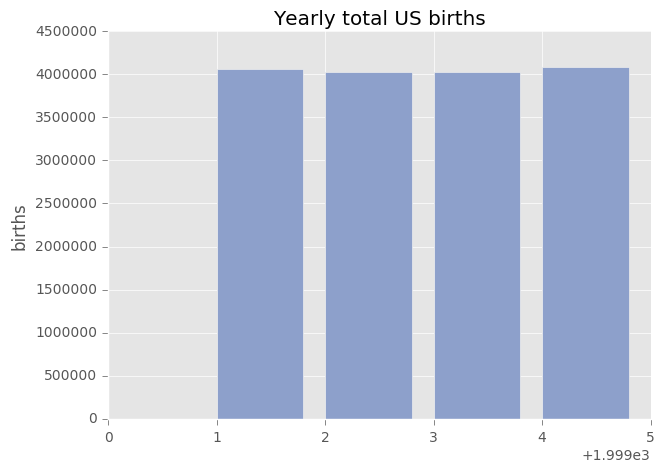

'\nax.bar(dataCDC["year"], dataCDC["total_births"], 0.8,\n        align="center", color=plot_colours[2], label="CDC")\ndone# yearly_births_2 <- births_intersection %>% group_by(year, source) %>% summarize(total_births = sum(births))\nggplot(yearly_births_2, aes(year, total_births, fill=source)) +\n     geom_bar(stat = "identity", position = position_dodge()) + \n     scale_fill_manual(values=plot_colours[c(3,8)]) +\n     labs(y="births", x="", title="Yearly total US births") +\n     theme(plot.title = element_text(hjust = 0.5))   # center the tile\n'

In [25]:
### compare yearly total births
yearly_births_2 = births_intersection.groupby(["year","source"])["births"].agg({"total_births": np.sum})
yearly_births_2.reset_index(inplace=True)
yearly_births_2.head()
dataCDC = yearly_births_2[yearly_births_2["source"] == "CDC"]
dataSSA = yearly_births_2[yearly_births_2["source"] == "SSA"]

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1)
ax.bar(dataCDC["year"].values, dataCDC["total_births"], 0.8,
       #  align="center", 
       color=plot_colours[2], label="CDC")
#ax.bar(dataSSA["year"], dataSSA["total_births"], 0.8,
#        align="center", color=plot_colours[7], label="SSA")
ax.set_xlim(1999, 2004)
ax.set_ylabel("births")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(right="off", top="off")
plt.title("Yearly total US births")

plt.show();


'''
ax.bar(dataCDC["year"], dataCDC["total_births"], 0.8,
        align="center", color=plot_colours[2], label="CDC")
done# yearly_births_2 <- births_intersection %>% group_by(year, source) %>% summarize(total_births = sum(births))
ggplot(yearly_births_2, aes(year, total_births, fill=source)) +
     geom_bar(stat = "identity", position = position_dodge()) + 
     scale_fill_manual(values=plot_colours[c(3,8)]) +
     labs(y="births", x="", title="Yearly total US births") +
     theme(plot.title = element_text(hjust = 0.5))   # center the tile
'''

In [19]:
?plt.bar

In [17]:
# TODO: 
# - enhance boxplots with color
# - add a "Further Exploration" section (also in R notebook file)